In [1]:
# Decision tree model 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os 
for dirname,_,filenames in os.walk("D:/Projects/Decision tree"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

D:/Projects/Decision tree\car_evaluation.csv


In [4]:
df = pd.read_csv(r"D:\Projects\Decision tree\car_evaluation.csv")

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.shape

(1727, 7)

In [7]:
# rename the columns name

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
# frquency distribution of categorical data's
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
X= df.drop('class',axis=1)
y=df['class']

In [14]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
Xtrain.shape,ytest.shape

((1381, 6), (346,))

In [16]:
Xtrain.head()

,buying,maint,doors,persons,lug_boot,safety
1648,low,low,3,2,small,high
1465,low,high,4,2,big,high
361,vhigh,low,3,4,small,high
315,vhigh,med,5more,more,small,med
1372,low,vhigh,4,more,med,high


In [17]:
# see all are categorical we should encode the dataset
import category_encoders as ce
encoder = ce.OrdinalEncoder(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
Xtrain = encoder.fit_transform(Xtrain)
Xtest = encoder.transform(Xtest)

In [18]:
Xtrain.head()

,buying,maint,doors,persons,lug_boot,safety
1648,1,1,1,1,1,1
1465,1,2,2,1,2,1
361,2,1,1,2,1,1
315,2,3,3,3,1,2
1372,1,4,2,3,3,1


In [19]:
Xtest.head()

,buying,maint,doors,persons,lug_boot,safety
1318,1,4,4,3,3,1
124,2,2,4,2,2,1
648,3,3,4,1,1,2
249,2,3,1,1,2,2
1598,1,3,3,1,2,3


In [50]:
# decision classifier
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5,random_state=0)
dec.fit(Xtrain,ytrain)


DecisionTreeClassifier(max_depth=5, random_state=0)

In [51]:
ypred = dec.predict(Xtest)

In [52]:
from sklearn.metrics import accuracy_score
print('Decision tree model accuracy: {0:0.4f}'.format(accuracy_score(ytest,ypred)))

Decision tree model accuracy: 0.8468


In [53]:
# training and set accuracy

In [54]:
ypred_train = dec.predict(Xtrain)
print('Training accuracy: {0:0.4f}'.format(accuracy_score(ytrain,ypred_train)))

Training accuracy: 0.8602


In [55]:
ypred_test = dec.predict(Xtest)
print('Decision tree model accuracy: {0:0.4f}'.format(accuracy_score(ytest,ypred_test)))


Decision tree model accuracy: 0.8468


In [56]:
print('Training set score: {:.4f}'.format(dec.score(Xtrain, ytrain)))

print('Test set score: {:.4f}'.format(dec.score(Xtest, ytest)))

Training set score: 0.8602
Test set score: 0.8468


In [57]:
# visualize the decision tree

[Text(0.5, 0.9166666666666666, 'x[3] <= 1.5\ngini = 0.454\nsamples = 1381\nvalue = [307, 55, 970, 49]'),
 Text(0.4375, 0.75, 'gini = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.5625, 0.75, 'x[5] <= 2.5\ngini = 0.577\nsamples = 918\nvalue = [307, 55, 507, 49]'),
 Text(0.5, 0.5833333333333334, 'x[1] <= 3.5\ngini = 0.627\nsamples = 616\nvalue = [307, 55, 205, 49]'),
 Text(0.25, 0.4166666666666667, 'x[0] <= 1.5\ngini = 0.623\nsamples = 464\nvalue = [254, 55, 106, 49]'),
 Text(0.125, 0.25, 'x[5] <= 1.5\ngini = 0.696\nsamples = 113\nvalue = [40, 34, 6, 33]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.584\nsamples = 56\nvalue = [8, 12, 3, 33]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.533\nsamples = 57\nvalue = [32, 22, 3, 0]'),
 Text(0.375, 0.25, 'x[4] <= 1.5\ngini = 0.541\nsamples = 351\nvalue = [214, 21, 100, 16]'),
 Text(0.3125, 0.08333333333333333, 'gini = 0.55\nsamples = 118\nvalue = [50, 7, 61, 0]'),
 Text(0.4375, 0.08333333333333333, 'gini = 0.468\nsamples = 233\nval

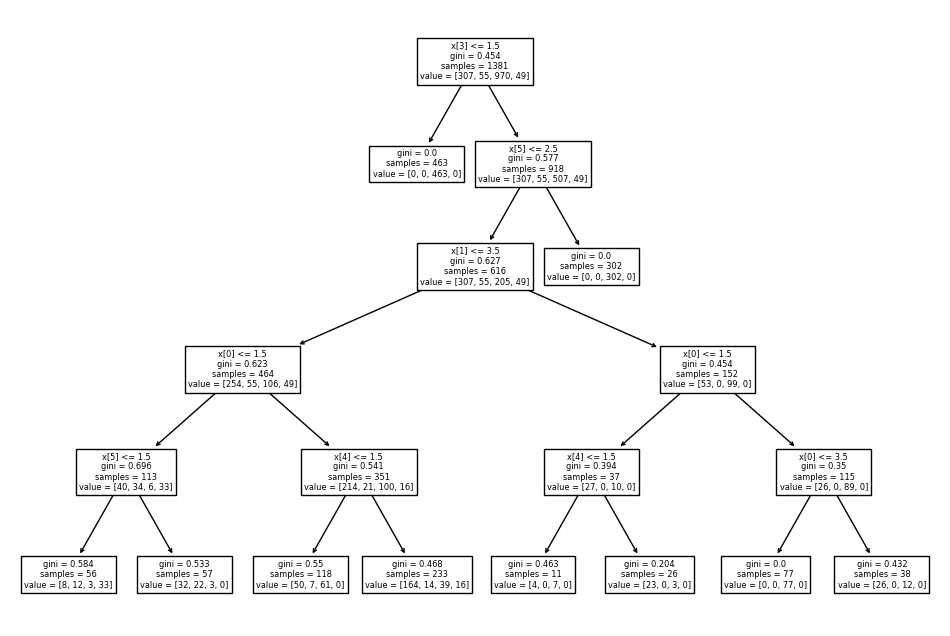

In [58]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dec.fit(Xtrain, ytrain))

In [29]:
# visualize decision tree with graphvia

In [33]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


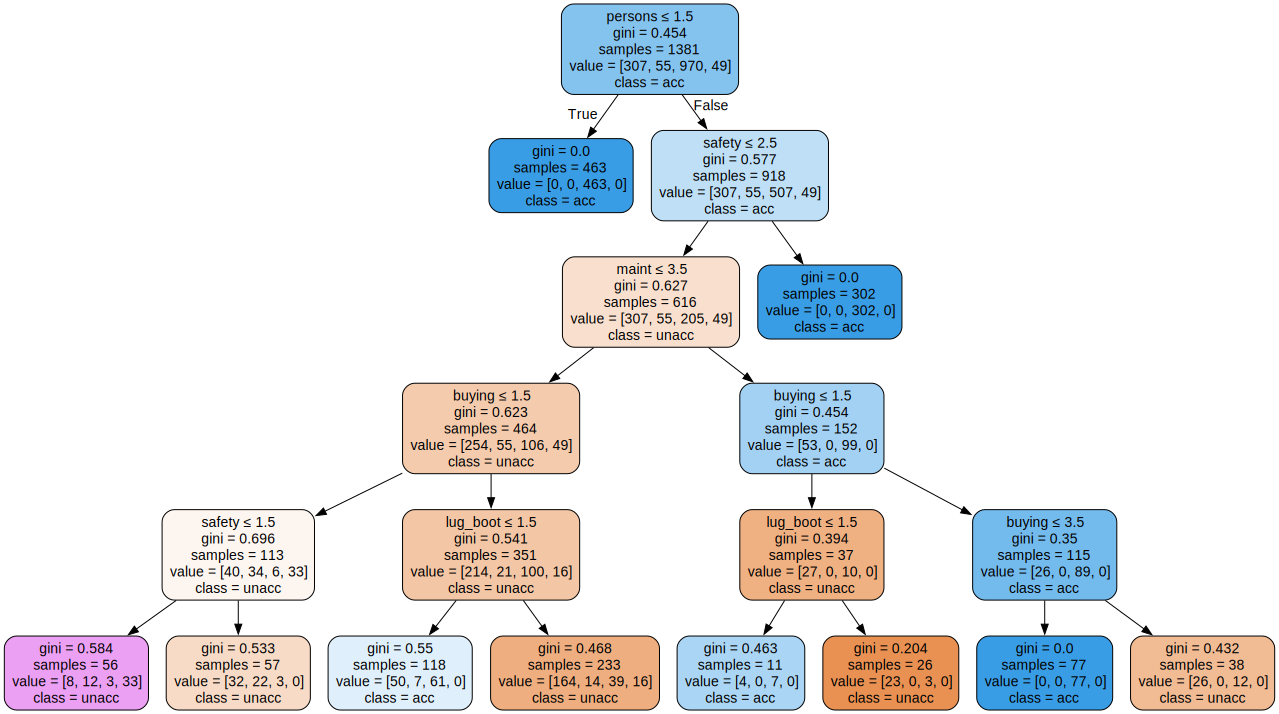

In [59]:
import graphviz 
dot_data = tree.export_graphviz(dec, out_file=None, 
                              feature_names=Xtrain.columns,  
                              class_names=ytrain,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [64]:
# decision classifier with entropy
from sklearn.tree import DecisionTreeClassifier
dec1 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5,random_state=0)
dec1.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [65]:
ypred1 = dec1.predict(Xtest)

In [66]:
from sklearn.metrics import accuracy_score
print('Decision tree model (entropy) accuracy: {0:0.4f}'.format(accuracy_score(ytest,ypred1)))

Decision tree model (entropy) accuracy: 0.8497


In [67]:
ypred_train = dec1.predict(Xtrain)
print('Training accuracy: {0:0.4f}'.format(accuracy_score(ytrain,ypred_train)))

Training accuracy: 0.8501


In [68]:
ypred_test = dec1.predict(Xtest)
print('Decision tree model accuracy: {0:0.4f}'.format(accuracy_score(ytest,ypred_test)))

Decision tree model accuracy: 0.8497


In [69]:
print('Training set score: {:.4f}'.format(dec1.score(Xtrain, ytrain)))

print('Test set score: {:.4f}'.format(dec1.score(Xtest, ytest)))

Training set score: 0.8501
Test set score: 0.8497


[Text(0.5, 0.9166666666666666, 'x[3] <= 1.5\nentropy = 1.196\nsamples = 1381\nvalue = [307, 55, 970, 49]'),
 Text(0.4375, 0.75, 'entropy = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.5625, 0.75, 'x[5] <= 2.5\nentropy = 1.47\nsamples = 918\nvalue = [307, 55, 507, 49]'),
 Text(0.5, 0.5833333333333334, 'x[1] <= 3.5\nentropy = 1.631\nsamples = 616\nvalue = [307, 55, 205, 49]'),
 Text(0.25, 0.4166666666666667, 'x[0] <= 1.5\nentropy = 1.67\nsamples = 464\nvalue = [254, 55, 106, 49]'),
 Text(0.125, 0.25, 'x[5] <= 1.5\nentropy = 1.795\nsamples = 113\nvalue = [40, 34, 6, 33]'),
 Text(0.0625, 0.08333333333333333, 'entropy = 1.553\nsamples = 56\nvalue = [8, 12, 3, 33]'),
 Text(0.1875, 0.08333333333333333, 'entropy = 1.221\nsamples = 57\nvalue = [32, 22, 3, 0]'),
 Text(0.375, 0.25, 'x[0] <= 3.5\nentropy = 1.397\nsamples = 351\nvalue = [214, 21, 100, 16]'),
 Text(0.3125, 0.08333333333333333, 'entropy = 0.943\nsamples = 236\nvalue = [151, 0, 85, 0]'),
 Text(0.4375, 0.08333333333333333, 'en

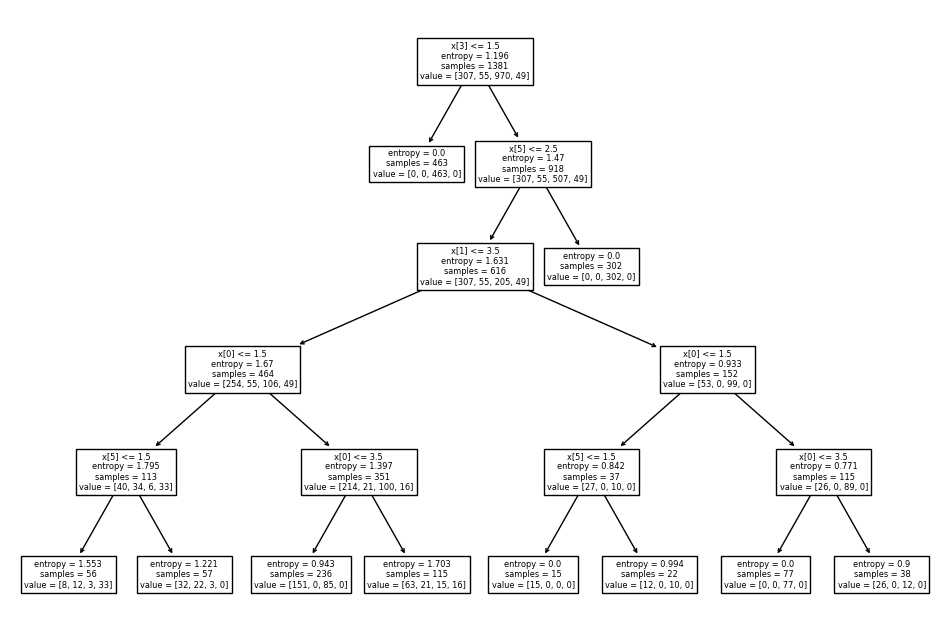

In [71]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dec1.fit(Xtrain, ytrain))

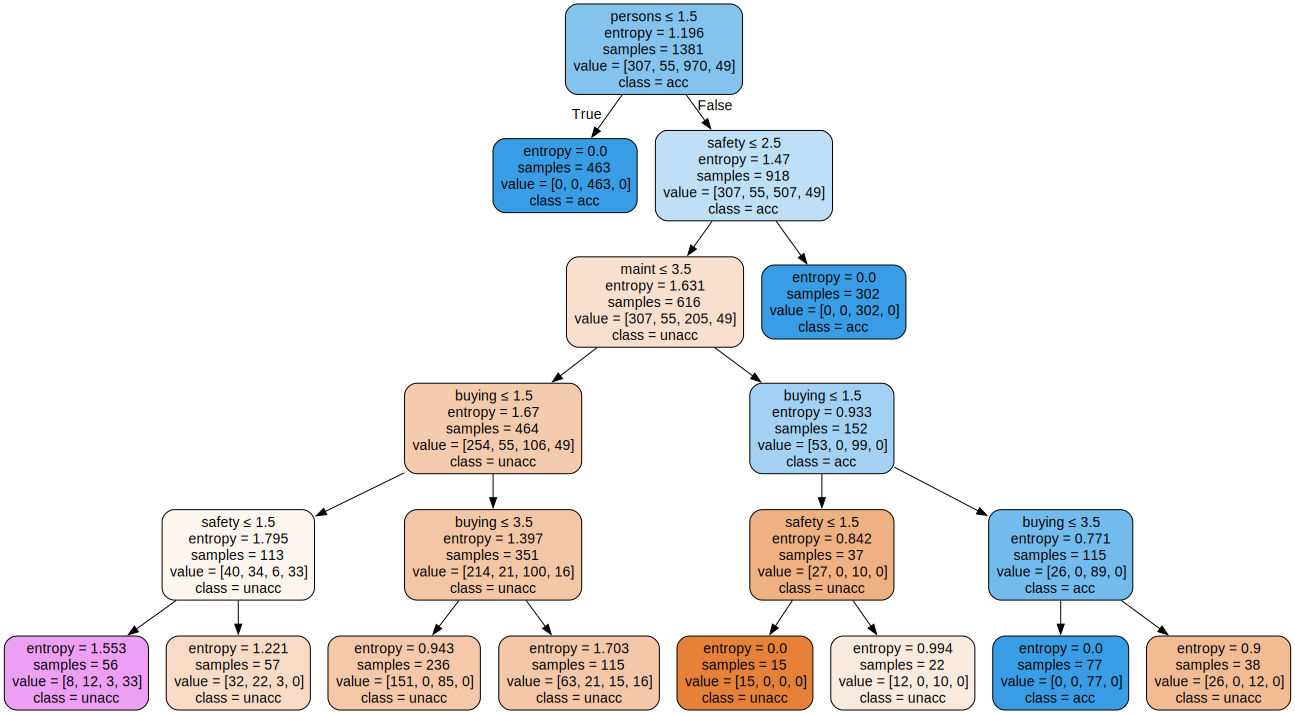

In [73]:
import graphviz 
dot_data = tree.export_graphviz(dec1, out_file=None, 
                              feature_names=Xtrain.columns,  
                              class_names=ytrain,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred1)

print('Confusion matrix\n\n', cm)
# this confusion matrix shows 4 cm for 4 categorical 

Confusion matrix

 [[ 75   0   0   2]
 [  6   0   0   8]
 [ 26   0 213   0]
 [ 10   0   0   6]]


In [81]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

         acc       0.64      0.97      0.77        77
        good       0.00      0.00      0.00        14
       unacc       1.00      0.89      0.94       239
       vgood       0.38      0.38      0.38        16

    accuracy                           0.85       346
   macro avg       0.50      0.56      0.52       346
weighted avg       0.85      0.85      0.84       346



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
